In [575]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline

from sklearn.compose import TransformedTargetRegressor

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler
)

from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
    cross_validate
)

# Regression models
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Prediction task: This model takes in information about housing and predicts housing prices.

In [576]:
# Load the dataset
dataset = pd.read_csv("kc_house_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [577]:
# Checking for data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [578]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [579]:
dataset.shape

(21613, 21)

In [580]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Preprocessing Data

In [581]:
# Check for null values
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [582]:
# The "date" feature is a string object.
dataset["date"]

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [583]:
# Turn the date feature from a string to datetime
dataset["date"] = pd.to_datetime(dataset["date"], 
    format = "%Y%m%dT%H%M%S", 
    errors = "coerce")
 
dataset["date"].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [584]:
# Create a new feature called "date_year" which is the year the house was sold
dataset["date_year"] = dataset["date"].dt.year
dataset["date_year"].head()

0    2014
1    2014
2    2015
3    2014
4    2015
Name: date_year, dtype: int64

In [585]:
# Create a new feature called "day_of_week" which is the day of the week the house was sold
dataset["date_day_of_week"] = dataset["date"].dt.dayofweek
dataset["date_day_of_week"].head()

0    0
1    1
2    2
3    1
4    2
Name: date_day_of_week, dtype: int64

In [586]:
# Let's quickly check if day_of_week is predictive of sale price
# Houses seem to sell for slightly higher on Saturdays
dataset.groupby("date_day_of_week").apply(lambda g: np.mean(g.price.values))

date_day_of_week
0    543757.960478
1    541054.204666
2    538534.832066
3    531543.796695
4    544220.936228
5    564950.738676
6    537103.413043
dtype: float64

In [587]:
# Create a new feature called "age" which is the age of the house when it was sold (in years)
dataset["age"] = dataset["date_year"] - dataset["yr_built"]
dataset["age"].head()

0    59
1    63
2    82
3    49
4    28
Name: age, dtype: int64

In [588]:
# Create a new feature called "renovated" which is 0 for never been renovated since it was built, and 1 for has been renovated since it was built
dataset["renovated"] = dataset["yr_renovated"]
dataset.loc[dataset['renovated'] > 0, 'renovated'] = 1
dataset["renovated"]

0        0
1        1
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: renovated, Length: 21613, dtype: int64

In [589]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21613 non-null  int64         
 1   date              21613 non-null  datetime64[ns]
 2   price             21613 non-null  float64       
 3   bedrooms          21613 non-null  int64         
 4   bathrooms         21613 non-null  float64       
 5   sqft_living       21613 non-null  int64         
 6   sqft_lot          21613 non-null  int64         
 7   floors            21613 non-null  float64       
 8   waterfront        21613 non-null  int64         
 9   view              21613 non-null  int64         
 10  condition         21613 non-null  int64         
 11  grade             21613 non-null  int64         
 12  sqft_above        21613 non-null  int64         
 13  sqft_basement     21613 non-null  int64         
 14  yr_built          2161

# Exploratory Data Analysis

In [590]:
# Differentiate between numerical and categorical features
# Drop "id", "date", "yr_built", "yr_renovated", "date_year"
numerical = [
  'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'age', 
  'sqft_living15', 'sqft_lot15'
]
categorical = [
  'waterfront', 'view', 'condition', 'grade', 'renovated'
]
dataset = dataset[numerical + categorical]
dataset.shape

(21613, 19)

In [591]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,zipcode,lat,long,age,sqft_living15,sqft_lot15,waterfront,view,condition,grade,renovated
0,221900.0,3,1.00,1180,5650,1.0,1180,0,98178,47.5112,-122.257,59,1340,5650,0,0,3,7,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400,98125,47.7210,-122.319,63,1690,7639,0,0,3,7,1
2,180000.0,2,1.00,770,10000,1.0,770,0,98028,47.7379,-122.233,82,2720,8062,0,0,3,6,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910,98136,47.5208,-122.393,49,1360,5000,0,0,5,7,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0,98074,47.6168,-122.045,28,1800,7503,0,0,3,8,0


In [592]:
print("Minimum price: ${:.2f}".format(dataset["price"].min()))
print("Maximum price: ${:.2f}".format(dataset["price"].max()))
print("Average price: ${:.2f}".format(dataset["price"].mean()))
print(dataset["sqft_basement"].median())

Minimum price: $75000.00
Maximum price: $7700000.00
Average price: $540088.14
0.0


<AxesSubplot:>

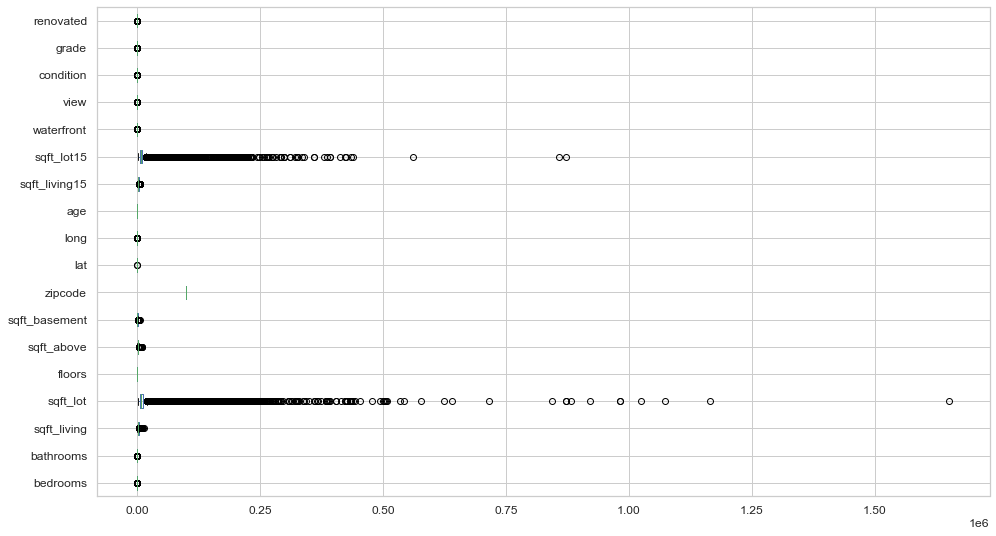

In [593]:
# Plot a boxplot to see the standard deviation of the features
dataset.loc[:, dataset.columns!='price'].plot.box(vert=False, figsize=(16, 9))

### sqft_lot15 and sqft_lot has very large range and deviations.

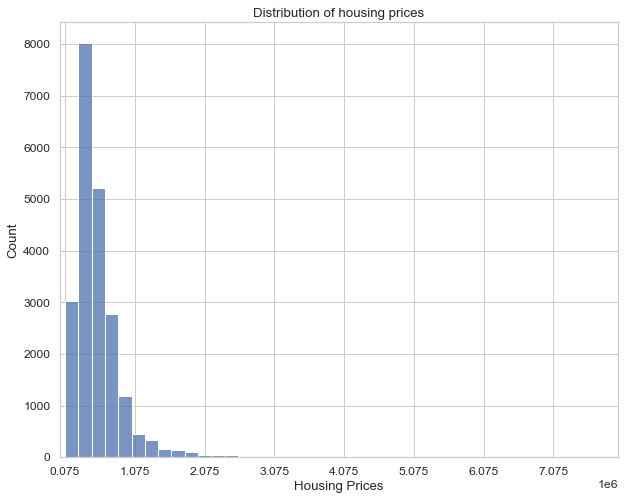

In [594]:
# EDA for housing price (target variable)
fig, ax = plt.subplots(figsize=(10,8))
sns.set(style="whitegrid", palette="deep", font_scale=1.1)
sns.histplot(dataset, x="price", ax=ax, bins=40)
ax.set_xlim(0,8000000)
ax.set_xticks(np.arange(min(dataset["price"]), max(dataset["price"])+1, 1000000))
plt.title("Distribution of housing prices")
plt.xlabel("Housing Prices")
plt.show()

### Most houses sold between $75,000 and $600,000. Very few were sold above $1,000,000.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

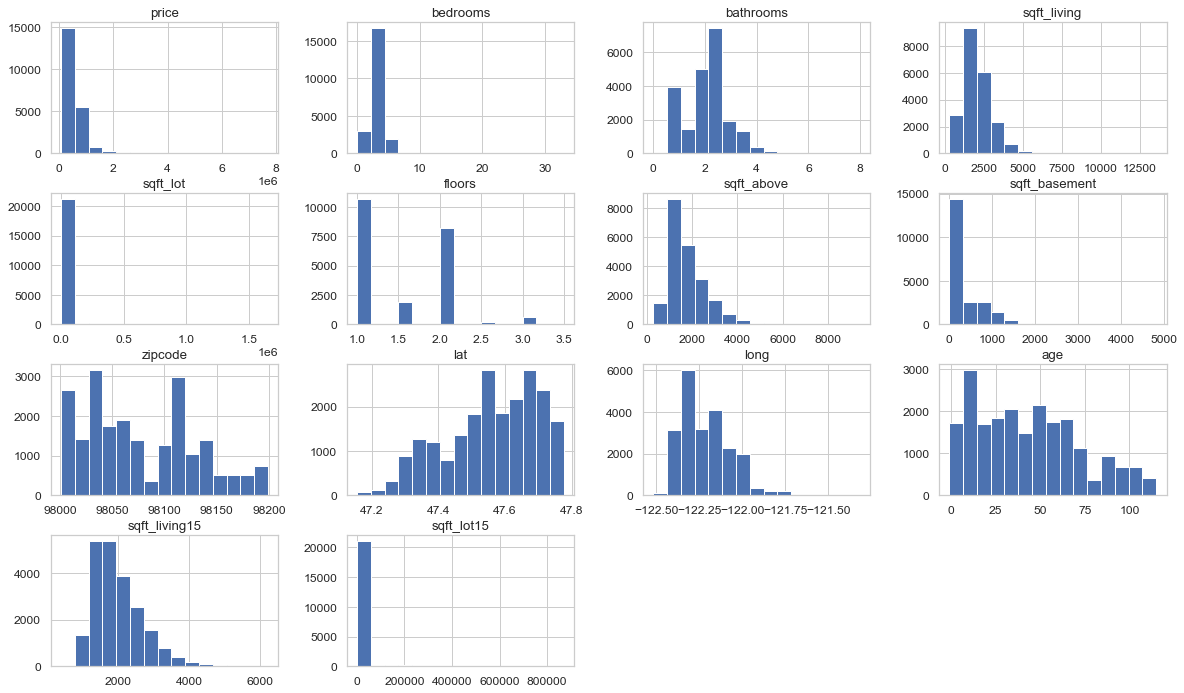

In [595]:
# EDA for the numerical features
dataset[numerical].hist(bins=15, figsize=(20,15), layout=(5,4))

### Year_built is skewed left, most houses are sold in late 1900s.

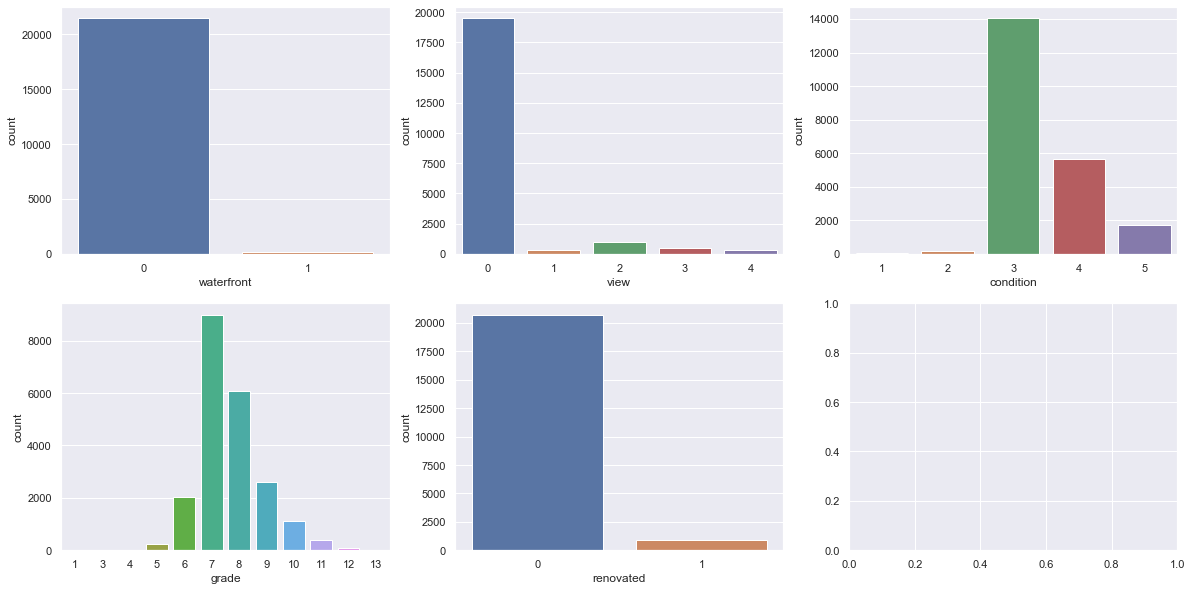

In [596]:
# EDA for categorical features
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=dataset[variable], ax=subplot)

### Most houses do not have good view nor waterfronts.

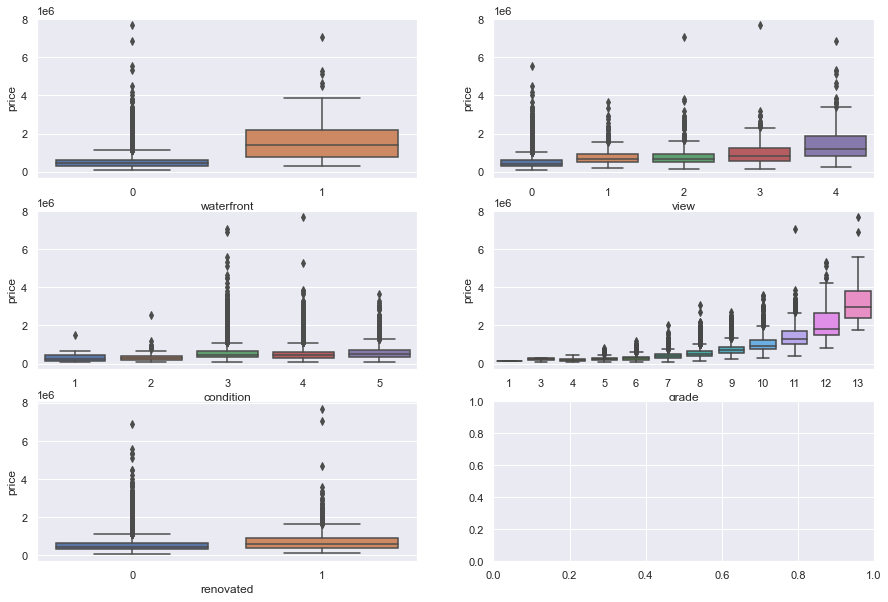

In [597]:
# Compare categorical features with price
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price', data=dataset, ax=subplot)

### Houses with waterfront and higher grade sell for much higher on average, houses with better view also sell for higher on average.<br> There is little variance in average price between houses with different conditions. Houses that were renovated sold for slightly higher on average.

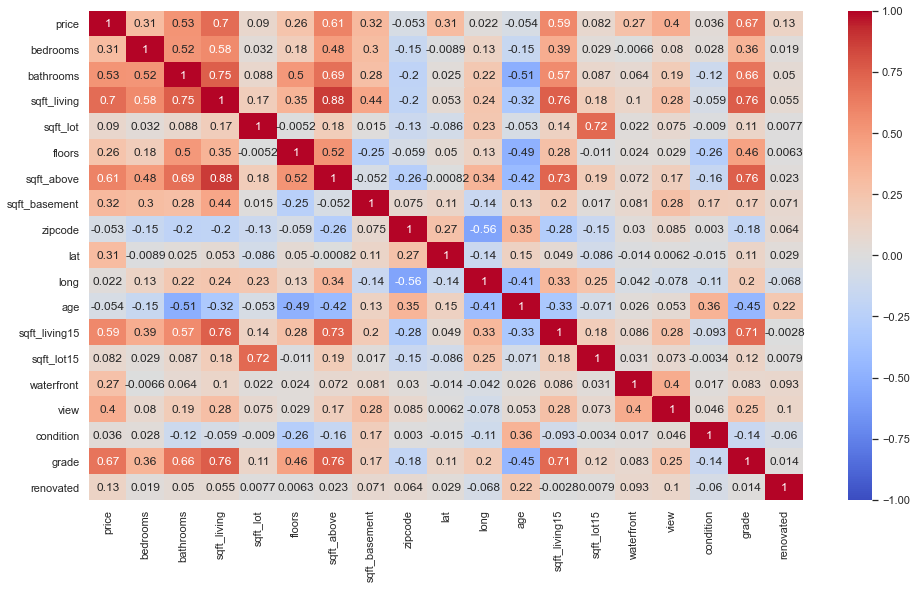

In [598]:
# Heatmap to show correlation between features
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, ax=ax)
plt.show()

In [599]:
# Define features and target
X = dataset.drop("price", axis=1)
y = dataset["price"]
print(X.shape)
print(y.shape)

(21613, 18)
(21613,)


In [600]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,zipcode,lat,long,age,sqft_living15,sqft_lot15,waterfront,view,condition,grade,renovated
0,3,1.00,1180,5650,1.0,1180,0,98178,47.5112,-122.257,59,1340,5650,0,0,3,7,0
1,3,2.25,2570,7242,2.0,2170,400,98125,47.7210,-122.319,63,1690,7639,0,0,3,7,1
2,2,1.00,770,10000,1.0,770,0,98028,47.7379,-122.233,82,2720,8062,0,0,3,6,0
3,4,3.00,1960,5000,1.0,1050,910,98136,47.5208,-122.393,49,1360,5000,0,0,5,7,0
4,3,2.00,1680,8080,1.0,1680,0,98074,47.6168,-122.045,28,1800,7503,0,0,3,8,0


In [601]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [602]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [603]:
# Default parameters
dict_regressors = {
    "Dummy": DummyRegressor(),
    "Support Vector Regression": SVR(),
    "Linear Regression": LinearRegression(),
    "K Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor()
}

In [604]:
# Compare different models
result = []

for model, model_instantiation in dict_regressors.items():
    # Normalise the features
    steps=[('scaler', MinMaxScaler()),
        (model, model_instantiation)]
    
    pipeline = Pipeline(steps)

    # Prepare the model with target normalisation
    transformed_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

    # Fit the model on the training set
    transformed_model.fit(X_train, y_train)

    # Evaluate the model
    result_dict = cross_validate(transformed_model, X_train, y_train, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], n_jobs=3)
    # Append the resulting dictionary into a list
    result.append(result_dict)

# Turn the list of dictionaries into a pandas dataframe
dataframe = pd.DataFrame(result, index=dict_regressors.keys())

In [605]:
# Create a loop that calculates the mean of each cell/list
for column in dataframe.columns:
    dataframe[column] = dataframe[column].apply(lambda x: sum(x)/len(x))
dataframe.sort_values(by=['test_r2', 'test_neg_root_mean_squared_error'], ascending=False)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_root_mean_squared_error
Extra Trees,6.256989,0.154862,0.874604,-1.659880e+10,-128514.739865
Random Forest,23.917040,0.276806,0.872354,-1.676539e+10,-129291.219403
K Nearest Neighbors,0.045646,4.393539,0.785365,-2.859100e+10,-168174.163297
Decision Tree,0.432608,0.010157,0.734554,-3.430692e+10,-184801.413900
Linear Regression,0.067124,0.016661,0.695606,-4.029493e+10,-200362.239897
Support Vector Regression,0.671845,0.165806,0.368890,-8.234983e+10,-286786.120968
Dummy,0.045185,0.014858,-0.000560,-1.323773e+11,-363229.892357


In [606]:
# Use Extra Trees Regressor and tune its hyperparameters

pipeline = Pipeline(
    steps=[
            ('ExtraTrees', ExtraTreesRegressor())
    ], verbose=True
)
# Prepare the model with target normalisation
transformed_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# Do hyperparameter tuning for the model
parameters = {'ExtraTrees__n_estimators': [100, 350, 500],
    'ExtraTrees__max_depth': np.arange(10,101,10)
    }
    
# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, n_jobs=3, verbose=1)

# Fit the model on the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
print("Tuned ExtraTrees Best Parameters: {}".format(gm_cv.best_params_))
print("Tuned ExtraTrees R Squared: {}".format(gm_cv.best_score_))

In [607]:
print(gm_cv.best_score_)
print(gm_cv.best_params_)
print(gm_cv.best_estimator_)

In [608]:
dict_regressors = {
    "Dummy": DummyRegressor(),
    "Support Vector Regression": SVR(),
    "Linear Regression": LinearRegression(),
    "K Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Extra Trees": ExtraTreesRegressor(max_depth=30, n_estimators=500)
}

In [609]:
# Compare different models with newly tuned extra trees
result = []

for model, model_instantiation in dict_regressors.items():
    # Normalise the features
    steps=[('scaler', MinMaxScaler()),
        (model, model_instantiation)]
    
    pipeline = Pipeline(steps)

    # Prepare the model with target normalisation
    transformed_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

    # Fit the model on the training set
    transformed_model.fit(X_train, y_train)

    # Evaluate the model
    result_dict = cross_validate(transformed_model, X_train, y_train, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error'], n_jobs=3)
    # Append the resulting dictionary into a list
    result.append(result_dict)

# Turn the list of dictionaries into a pandas dataframe
dataframe = pd.DataFrame(result, index=dict_regressors.keys())

In [610]:
# Create a loop that calculates the mean of each cell/list
for column in dataframe.columns:
    dataframe[column] = dataframe[column].apply(lambda x: sum(x)/len(x))
dataframe.sort_values(by=['test_r2', 'test_neg_root_mean_squared_error'], ascending=False)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_root_mean_squared_error
Extra Trees,49.620012,1.662388,0.875630,-1.646238e+10,-127992.276636
Random Forest,17.554329,0.202083,0.875626,-1.631188e+10,-127603.818469
K Nearest Neighbors,0.037219,2.937367,0.785365,-2.859100e+10,-168174.163297
Decision Tree,0.494251,0.009376,0.724698,-3.553827e+10,-188151.061877
Linear Regression,0.057745,0.013541,0.695606,-4.029493e+10,-200362.239897
Support Vector Regression,0.335674,0.063318,0.368890,-8.234983e+10,-286786.120968
Dummy,0.043840,0.010717,-0.000560,-1.323773e+11,-363229.892357


In [614]:
final_model = ExtraTreesRegressor(max_depth=30, n_estimators=500)

# Build the pipeline
steps=[('scaler', MinMaxScaler()),
        ('model', final_model)]
    
pipeline = Pipeline(steps)

# Prepare the model with target normalisation
transformed_model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

# Fit the model on the test set
transformed_model.fit(X_train, y_train)


TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler', MinMaxScaler()),
                                                     ('model',
                                                      ExtraTreesRegressor(max_depth=30,
                                                                          n_estimators=500))]),
                           transformer=MinMaxScaler())

In [615]:
# Make predictions
y_pred = transformed_model.predict(X_test) 
r2 = transformed_model.score(X_test, y_test) 
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Summarize the fit of the model
print("R&2: {}".format(r2))
print("Root Mean Squared Error: {}".format(rmse))

R&2: 0.8826130521911149
Root Mean Squared Error: 130224.0801211019


In [616]:
# Features the model considers important
importances = transformed_model.regressor_.named_steps['model'].feature_importances_

In [618]:
# Display which features are most important to the model
df_importances = pd.DataFrame(importances, index=X_train.columns.values, columns=['score'])
df_importances = df_importances.sort_values(by=['score'], ascending=False)
df_importances

,score
grade,0.233141
sqft_living,0.178069
lat,0.139743
sqft_living15,0.080330
sqft_above,0.074717
waterfront,0.046731
long,0.045945
age,0.038201
bathrooms,0.037432
view,0.035074


In [619]:
df_importances_top10 = df_importances.head(10)
df_importances_top10

,score
grade,0.233141
sqft_living,0.178069
lat,0.139743
sqft_living15,0.080330
sqft_above,0.074717
waterfront,0.046731
long,0.045945
age,0.038201
bathrooms,0.037432
view,0.035074


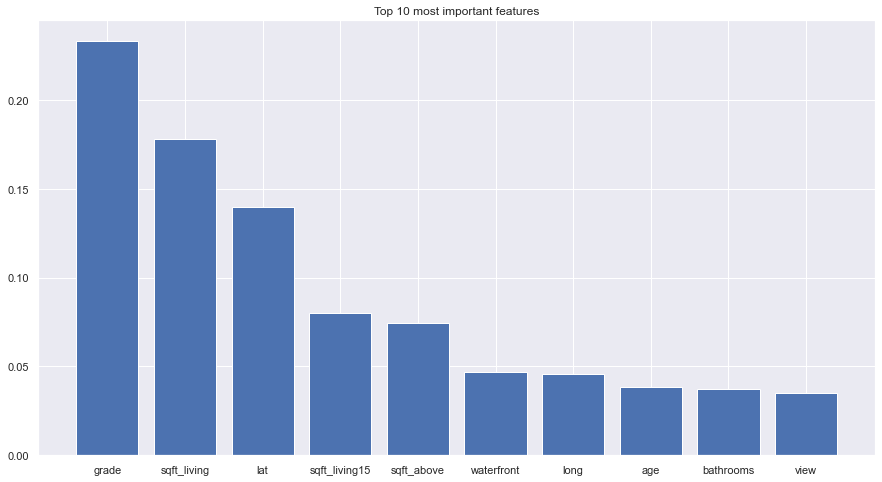

In [620]:
# plot feature importance
fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x=df_importances_top10.index, height=df_importances_top10['score'])
plt.title("Top 10 most important features")
plt.show()